# TIME SERIES DATASET

time series is quite different from the other ML models because :
            1. it is time dependent 
            2. variation in trend can change drastically
            
            simple machine learning models cannot be used on time series 
            we can use ARIMA and neural networks to predict the time based series output 
            
the objective of the predictive model is to establish the values of an unknown variable. 
a time series has time (t) as an independent variable (in any unit you can think of) and a target dependent variable (Yt). the o/p of the model is predicted value of y at time t (Y^t)

## TIME SERIES PROBLEMS ARE:
    
    1. FORCASTING SALES
    2. CALL VOLUME IN A CALL CENTER 
    3. SOLAR ACTIVITY
    4. OCEAN TIDES 
    5. STOCK MARKET BEHAVIOUR 
    6. CRYPTOCURRENCY PREDICTION
    

In [86]:
# dataset used-----> tata global beverages stock price
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense , Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

In [87]:
df=pd.read_csv("/home/hardik/Desktop/MACHINE LEARNING A-Z/DATASETS/NSE-TATAGLOBAL11.csv")

In [88]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


clearly we can see that we have multiple rows for every day 
    
    1.The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
    2.High, Low and Last represent the maximum, minimum, and last price of the share for the day.
    3.Total Trade Quantity is the number of shares bought or sold in the day.
    4.Turnover (Lacs) is the turnover of the particular company on a given date.


### The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable

In [89]:
# setting index as date
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df["Date"]

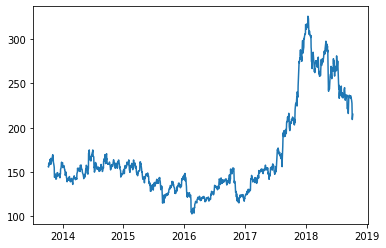

In [90]:
plt.plot(df["Close"],label="Close Price Hostory")

In [91]:
# now to predict the values of the closing values we will use LSTM neural network technique 
# aranging data into ascending order
data=df.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=["Date","Close"])
for i in range(0,len(data)):
    new_data["Date"][i]=data["Date"][i]
    new_data["Close"][i]=data["Close"][i]
new_data.index=new_data.Date

In [92]:
new_data.head()

,Date,Close
Date,,
2013-10-08,2013-10-08 00:00:00,155.8
2013-10-09,2013-10-09 00:00:00,155.55
2013-10-10,2013-10-10 00:00:00,160.15
2013-10-11,2013-10-11 00:00:00,160.05
2013-10-14,2013-10-14 00:00:00,159.45


In [93]:
new_data=new_data.drop("Date",axis=1)

In [94]:
new_data.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [95]:
# now lets split the dataset into training and validation 
dataset=new_data.values

In [96]:
train=dataset[0:987,:]
valid=dataset[987:,:]

In [97]:
#data normalization
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

/home/hardik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [98]:
x_train,y_train=[],[]
for i in range (60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [99]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [100]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [101]:
# now preparing the neural network model and train the value with the created dataset
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=1)

Epoch 1/1
927/927 [==============================] - 58s 62ms/step - loss: 0.0012


In [103]:
inputs=new_data[len(new_data)-len(valid)-60:].values  #dataset to predict the values for 
inputs=inputs.reshape(-1,1)  #same process as done on  train data 
inputs=scaler.transform(inputs)
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)

x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

/home/hardik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


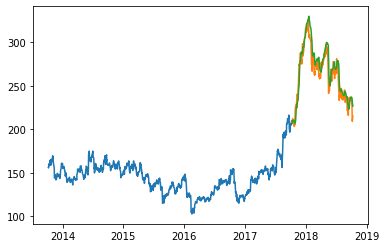

In [104]:
# to print the plot of predicted value
train = new_data[:987]          # again spliting the values of dataset so as to get clean values 
valid = new_data[987:]
valid['Predictions'] = closing_price  #adding new column in the table so as to save the values on the same table
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()